In [93]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn import tree

In [45]:
iris= pd.read_csv(r'C:\Users\Lenovo\Downloads\iris_data\iris.csv')

In [46]:
iris.head()

,5.1,3.5,1.4,0.2,Iris-setosa
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


In [47]:
iris.tail()

,5.1,3.5,1.4,0.2,Iris-setosa
144,6.7,3.0,5.2,2.3,Iris-virginica
145,6.3,2.5,5.0,1.9,Iris-virginica
146,6.5,3.0,5.2,2.0,Iris-virginica
147,6.2,3.4,5.4,2.3,Iris-virginica
148,5.9,3.0,5.1,1.8,Iris-virginica


In [48]:
iris.columns

Index(['5.1', '3.5', '1.4', '0.2', 'Iris-setosa'], dtype='object')

In [49]:
columns=['Sepallength','Sepalwidth','Petallength','Petalwidth','Species']

In [50]:
iris.columns=columns
iris.head()

,Sepallength,Sepalwidth,Petallength,Petalwidth,Species
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


In [51]:
iris.shape

(149, 5)

In [52]:
 iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sepallength  149 non-null    float64
 1   Sepalwidth   149 non-null    float64
 2   Petallength  149 non-null    float64
 3   Petalwidth   149 non-null    float64
 4   Species      149 non-null    object 
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [53]:
iris.describe()

,Sepallength,Sepalwidth,Petallength,Petalwidth
count,149.000000,149.000000,149.000000,149.000000
mean,5.848322,3.051007,3.774497,1.205369
std,0.828594,0.433499,1.759651,0.761292
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [54]:
iris.isnull().sum()

Sepallength    0
Sepalwidth     0
Petallength    0
Petalwidth     0
Species        0
dtype: int64

#### VISUALIZATION OF DATA

In [55]:
num= iris['Species'].value_counts()
num.to_frame()

,count
Species,
Iris-versicolor,50
Iris-virginica,50
Iris-setosa,49


In [56]:
labrl= num.index.tolist()
val=num.values.tolist()

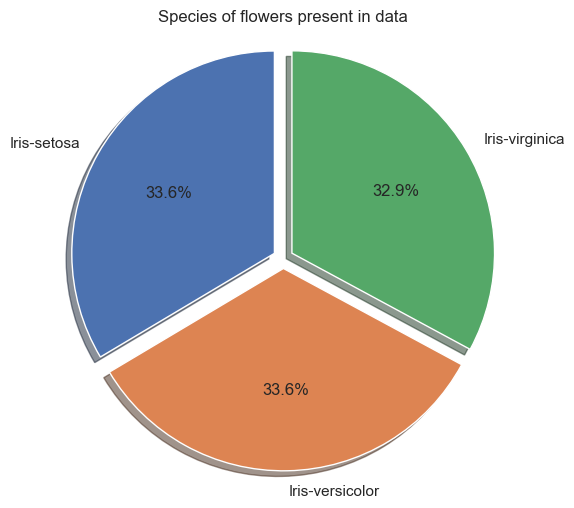

In [57]:
exp=(.05,.05,.05)
label='Iris-setosa','Iris-versicolor','Iris-virginica'
fix,ax=plt.subplots()
ax.pie(val,explode=exp,labels=label,autopct='%1.1f%%', shadow=True,startangle=90)
plt.title('Species of flowers present in data',fontsize=12)
ax.axis('equal')
plt.show()

C:\anaconda\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 2000x1000 with 0 Axes>

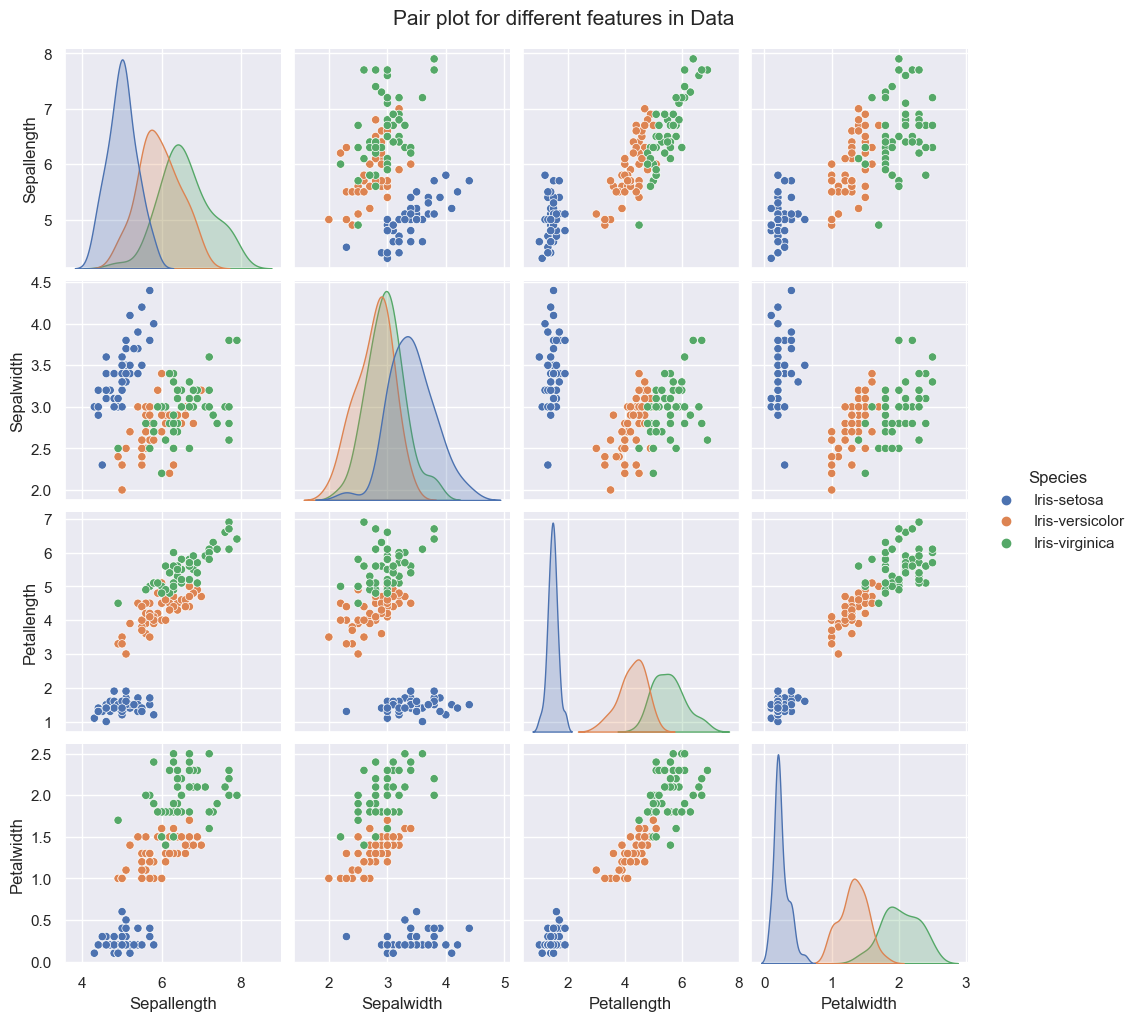

In [58]:
fig=plt.figure(figsize=(20,10))
visual=sns.pairplot(iris,hue='Species')
visual.fig.suptitle("Pair plot for different features in Data",y=1.02,fontsize=15)
plt.show()

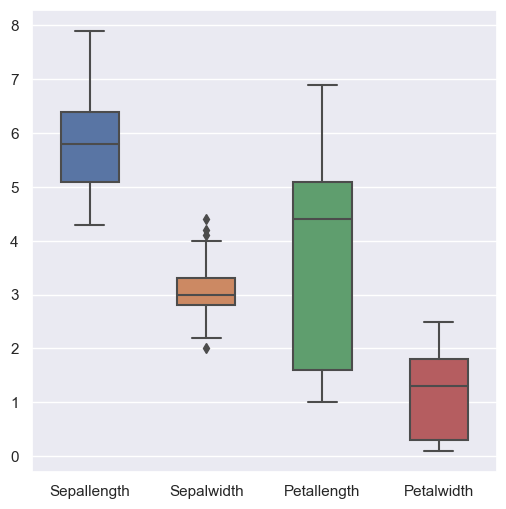

In [59]:
sns.boxplot(data=iris,width=0.5,fliersize=5)
sns.set(rc={"figure.figsize":(6,6)})

Index(['Sepallength', 'Sepalwidth', 'Petallength', 'Petalwidth', 'Species'], dtype='object')

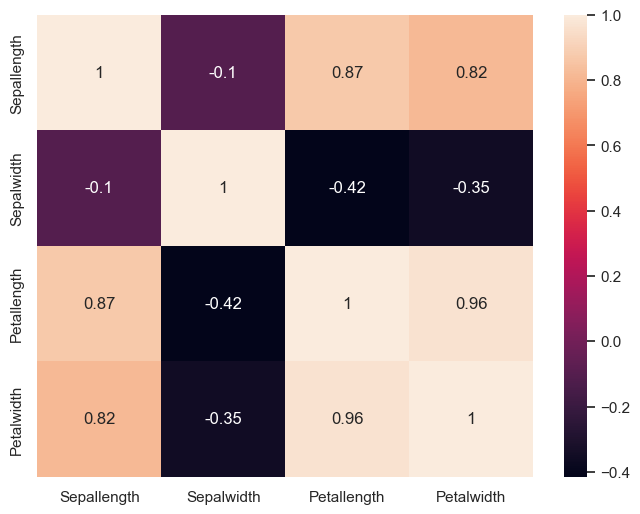

In [64]:
numeric_df = iris.select_dtypes(include=[int, float])
corr=numeric_df.corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr,annot=True)
iris.columns

<Axes: xlabel='Sepallength', ylabel='Species'>

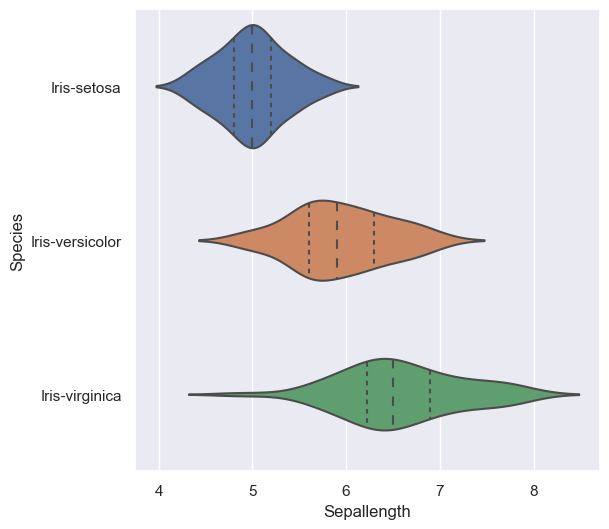

In [70]:
sns.violinplot(y='Species',x='Sepallength',data=iris,inner='quartile')

<Axes: xlabel='Sepalwidth', ylabel='Species'>

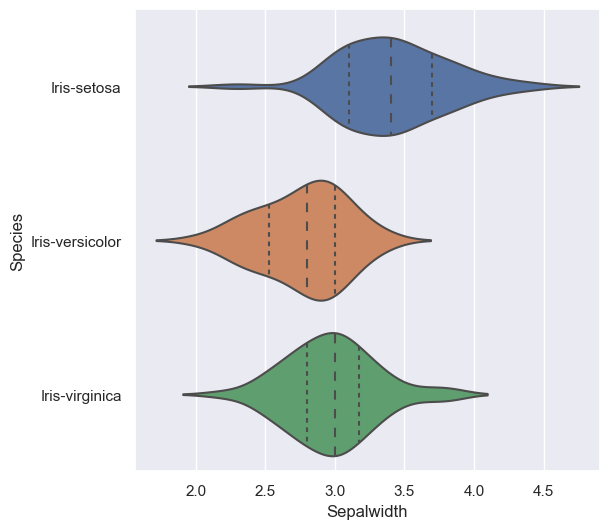

In [67]:
sns.violinplot(y='Species',x='Sepalwidth',data=iris,inner='quartile')

<Axes: xlabel='Petallength', ylabel='Species'>

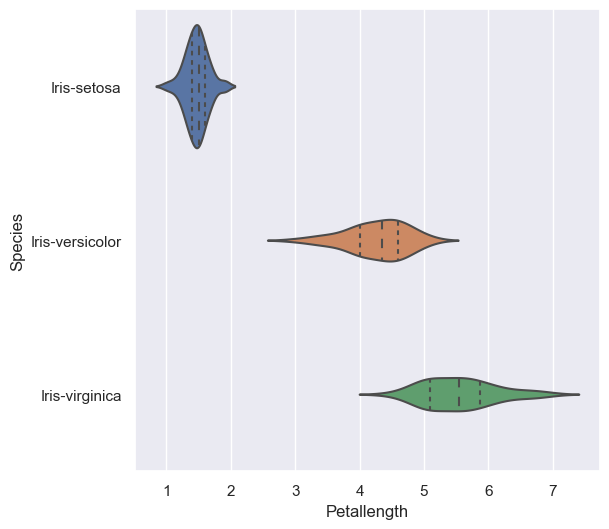

In [68]:
sns.violinplot(y='Species',x='Petallength',data=iris,inner='quartile')

<Axes: xlabel='Petalwidth', ylabel='Species'>

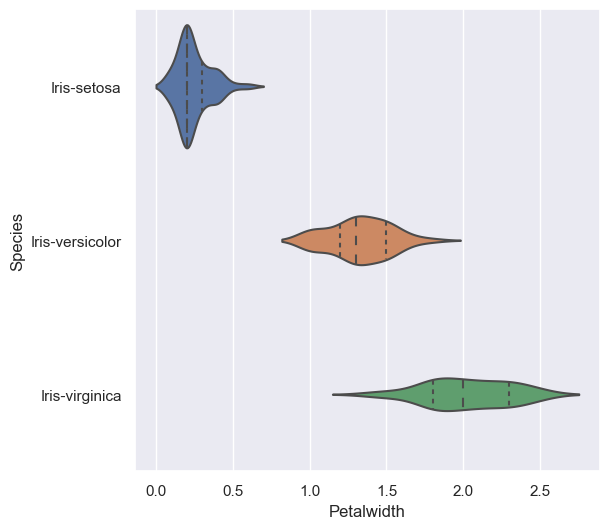

In [69]:
sns.violinplot(y='Species',x='Petalwidth',data=iris,inner='quartile')

In [71]:
X=iris.drop(['Species'],axis=1)
Y=iris['Species']
print(f'X shape:{X.shape} | y shape:{Y.shape}')

X shape:(149, 4) | y shape:(149,)


In [87]:
X=np.array(X)
Y=np.array(Y)

In [99]:
X_train,X_test, Y_train,Y_test=train_test_split(X,Y,test_size=0.10,random_state=101)

In [100]:
X_train.shape

(134, 4)

In [101]:
Y_train.shape

(134,)

In [85]:
X_test

array([[6.3, 2.5, 5. , 1.9],
       [5.5, 2.6, 4.4, 1.2],
       [5.7, 2.8, 4.5, 1.3],
       [6. , 2.9, 4.5, 1.5],
       [6. , 3.4, 4.5, 1.6],
       [4.9, 2.5, 4.5, 1.7],
       [5.8, 2.6, 4. , 1.2],
       [6.5, 2.8, 4.6, 1.5],
       [4.8, 3. , 1.4, 0.3],
       [5. , 2. , 3.5, 1. ],
       [4.6, 3.4, 1.4, 0.3],
       [5.1, 3.5, 1.4, 0.3],
       [5.6, 2.7, 4.2, 1.3],
       [5.7, 4.4, 1.5, 0.4],
       [5.2, 2.7, 3.9, 1.4]])

In [86]:
X_train

array([[4.9, 3.1, 1.5, 0.1],
       [6.4, 2.9, 4.3, 1.3],
       [4.8, 3.1, 1.6, 0.2],
       [5.8, 2.7, 4.1, 1. ],
       [5.5, 3.5, 1.3, 0.2],
       [6.9, 3.2, 5.7, 2.3],
       [6.7, 3. , 5.2, 2.3],
       [5.2, 4.1, 1.5, 0.1],
       [7.9, 3.8, 6.4, 2. ],
       [6.8, 3. , 5.5, 2.1],
       [5.4, 3.4, 1.7, 0.2],
       [6.9, 3.1, 4.9, 1.5],
       [5. , 3.3, 1.4, 0.2],
       [6.1, 3. , 4.6, 1.4],
       [6.3, 2.9, 5.6, 1.8],
       [6.4, 2.8, 5.6, 2.1],
       [5.7, 2.8, 4.1, 1.3],
       [5. , 3.5, 1.6, 0.6],
       [6.4, 3.1, 5.5, 1.8],
       [4.7, 3.2, 1.6, 0.2],
       [4.5, 2.3, 1.3, 0.3],
       [6.7, 2.5, 5.8, 1.8],
       [7.7, 2.6, 6.9, 2.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.8, 2.8, 5.1, 2.4],
       [6.7, 3.3, 5.7, 2.5],
       [5.9, 3.2, 4.8, 1.8],
       [6.8, 2.8, 4.8, 1.4],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.9, 1.7, 0.4],
       [5.1, 3.8, 1.6, 0.2],
       [4.9, 2.4, 3.3, 1. ],
       [5. , 3.5, 1.3, 0.3],
       [4.9, 3.1, 1.5, 0.1],
       [7.7, 3

In [91]:
Y_test

array(['Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-setosa', 'Iris-versicolor'], dtype=object)

In [92]:
Y_train

array(['Iris-setosa', 'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-setosa', 'Iris-virginica', 'Iris-virginica', 'Iris-setosa',
       'Iris-virginica', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-virginica', 'Iris-versicolor',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-virginica', 'Iris-setosa',
       'Iris-virginica', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-virginica', 'Iris-setosa',
       'Iris-virginica

### Model Accuracy

In [108]:
model=[]
model=LogisticRegression(max_iter=1000,class_weight='balanced')
model.fit(X_train, Y_train)

LogisticRegression(class_weight='balanced', max_iter=1000)

In [103]:
y_pred = model.predict(X_test)

In [105]:
accuracy = accuracy_score(Y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")
print(f'classification Report:\n{classification_report(Y_test,y_pred)}')

Model Accuracy: 0.87
classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         4
Iris-versicolor       0.88      0.88      0.88         8
 Iris-virginica       0.67      0.67      0.67         3

       accuracy                           0.87        15
      macro avg       0.85      0.85      0.85        15
   weighted avg       0.87      0.87      0.87        15

